#  Implementing Several Variants of Gradient Descent from Scratch

Now that we have understood several variants of gradient descent algorithm. In this section, we will understand how can we use them in finding the optimal parameters of simple linear regression. 


The equation of a simple linear regression can be expressed as:

$$ \hat{y} = mx + b -- (1) $$

Thus, we have two parameters $m$ and $b$. We will see how can we use gradient descent and find the optimal values for these two parameters $m$ and $b$. 

# Import the Libraries

Import the required libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')


import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Prepare the dataset

We generate some random data points with 500 rows and 2 columns (x and y) and use for training:

In [2]:
data = np.random.randn(500, 2)

As you can see our data has two columns:

In [3]:
data[0]

array([-1.32615471,  0.67611009])

First column indicates the $x$ value:

In [4]:
data[0,0]

-1.3261547057405747

Second column indicates the $y$ value:

In [5]:
data[0,1]

0.6761100886332423

We know that equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an array called theta. First, we initialize theta with zeros as shown below:

In [6]:
theta = np.zeros(2)

In [7]:
theta

array([0., 0.])

theta[0] represents the value of $m$ and theta[1] represents the value of $b$

# Loss Function 

Mean Squared Error (MSE) of Regression is given as:

$$J=\frac{1}{N} \sum_{i=1}^{N}(y-\hat{y})^{2} -- (2) $$


Where $N$ is the number of training samples, $y$ is the actual value and $\hat{y}$ is the predicted value.

The above loss function can be implemented as:

We feed the data and the model parameter theta to the loss function which returns the MSE. Remember, data[,0] has $x$ value and data[,1] has $y$ value. Similarly, theta [0] has a value of $m$ and theta[1] has a value of $b$. 

In [8]:
def loss_function(data,theta):
    
    #get m and b
    m = theta[0]
    b = theta[1]
    
    loss = 0
    
    #on each data point 
    for i in range(0, len(data)):
        
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        
        #predict the value of y 
        y_hat = (m*x + b)
        
        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
        
    #mean sqaured loss
    mean_squared_loss = loss / float(len(data))
        
    return mean_squared_loss

When we feed our randomly initialized data and model parameter theta, the loss_function returns the mean squared loss as shown below:

In [9]:
loss_function(data, theta)

0.8814103222330404

Now, we need to minimize this loss. In order to minimize the loss, we need to calculate the gradient of the loss function $J$ with respect to the model parameters $m$ and $b$ and update the parameter according to the parameter update rule. So, first, we will calculate the gradient of the loss function. 

# Gradients of Loss Function 


Gradients of loss function $J$ with respect to parameter $m$ is given as:


$$ \frac{d J}{d m}=\frac{2}{N} \sum_{i=1}^{N}-x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right) -- (3)$$


Gradients of loss function $J$ with respect to parameter $b$ is given as:
$$ \frac{d J}{d b}=\frac{2}{N} \sum_{i=1}^{N}-\left(y_{i}-\left(m x_{i}+b\right)\right) -- (4)$$

We define a function called compute_gradients which takes the data and parameter theta as an input and returns the computed gradients:

In [10]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)
    
    #total number of data points
    N = float(len(data))
    
    m = theta[0]
    b = theta[1]
    
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
           
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [11]:
compute_gradients(data,theta)

array([-0.0003067 , -0.00038062])

Thus, when we feed the randomly initialized data and model parameter theta, the compute_gradients function returns the gradients of $m$ i.e $\frac{d J}{d m}$ and gradients of $b$ i.e  $\frac{d J}{d b}$. 

# Update Rule

After computing gradients we need to update our model parameter according to our update rule as given below:

Update m:
$$m=m-\alpha \frac{d J}{d m} --(5) $$

Update b:
$$ b=b-\alpha \frac{d J}{d b} -- (6) $$


Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as: 

$$\theta = \theta - \alpha \frac{dJ}{d\theta} -- (7)$$

As we learned in the previous section, updating gradients for just one time will not lead us to the convergence i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for several iterations:


Set the number of iterations:

In [12]:
num_iterations = 50000

Define the learning rate

In [13]:
lr = 1e-2

Define a list called loss for storing the loss on every iterations:

In [14]:
loss = []

On each iteration, calculate gradients and update the gradients according to our parameter update rule (7):

In [15]:
theta = np.zeros(2)

for t in range(num_iterations):
    
    #compute gradients
    gradients = compute_gradients(data, theta)
    
    #update parameter
    theta = theta - (lr*gradients)
    
    #store the loss
    loss.append(loss_function(data,theta))

The below plot shows how the loss(cost) decreases over the training iterations:

Text(0.5,1,'Gradient Descent')

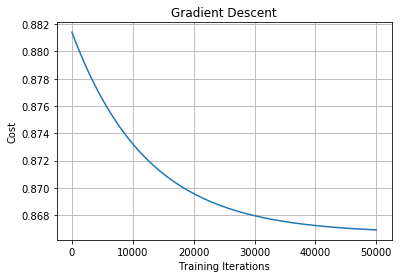

In [16]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

# MiniBatch Gradient Descent

We just learned how gradient descent works. In gradient descent, to perform a single
parameter update we iterate through all the data points in our training set. Updating the parameters of the model only after iterating through all the data points in the training set makes the gradient descent very slow and it will increase the training time
especially when we have a large dataset. 


So, we use minibatch gradient descent, in minibatch gradient descent, we update the parameters after iterating some batch of data points. Let us say the batch size is 50
which means that we update the parameter of the model after iterating through 50 data
points instead of updating the parameter after iterating through each individual data point.

In [17]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):
    
    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)
        
        #sample batch of data
        sample_data = data[0:sample_size[0], :]
        
        #compute gradients
        grad = compute_gradients(sample_data, theta)
       
        #update parameters
        theta = theta - (lr * grad)
        
        loss.append(loss_function(data,theta))
            
    return loss

Perform minibatch gradient descent and compute loss:

In [18]:
theta = np.zeros(2)
loss = minibatch(data, theta)

Plot the loss:

Text(0.5,1,'Mini-Batch Gradient Descent')

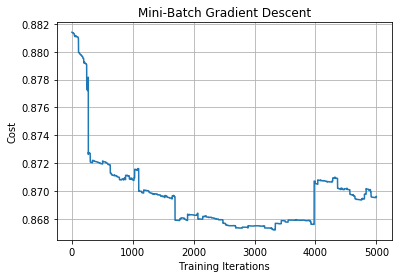

In [19]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mini-Batch Gradient Descent')

# Gradient descent with Momentum

Refer the book for the detailed explanation:

We learned how momentum helps us to reduce oscillations in the gradient steps and attain the convergence faster. The update equation of momentum is given as:

$$v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta) -- (8) $$

Update theta by: 
$${\theta = \theta - v_t } -- (9) $$

In [20]:
def Momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
    
    loss = []
    
    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
    
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta 
        gradients = compute_gradients(data, theta)
        
        #Update vt by equation (8)
        vt = gamma * vt + lr * gradients
        
        #update model parameter theta by equation (9)
        theta = theta - vt
    
        #store loss of every iteration
        loss.append(loss_function(data,theta))
        
    return loss

Perform gradient descent with mometum and compute loss:

In [21]:
theta = np.zeros(2)
loss = Momentum(data, theta)

Plot the loss:

Text(0.5,1,'Mometum')

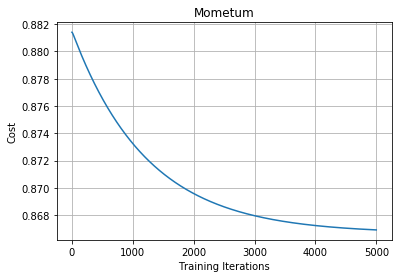

In [22]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mometum')

# Nesterov Accelerated Gradients

Refer the NAG section in the book for the detailed explanation.

The update equation of NAG is given as:

$$v_t = \gamma v_{t-1} + \eta \nabla_\theta J( \theta - \gamma v_{t-1} ) -- (10) $$

Update theta by:
$${\theta = \theta - v_t } -- (11) $$

In [23]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):
    
    loss = []
    
    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])
       
    for t in range(num_iterations):
        
        #compute gradients with respet to (theta-gamma*vt-1)
        gradients = compute_gradients(data, theta - gamma * vt)
        
        #update vt by equation (10)
        vt = gamma * vt + lr * gradients
        
        #update model parameter theta by equation (11)
        theta = theta - vt
        
        loss.append(loss_function(data,theta))
        
    return loss

Compute and update gradients using NAG:

In [24]:
theta = np.zeros(2)
loss = NAG(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

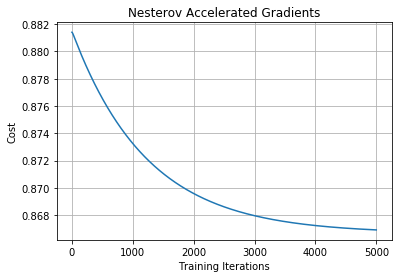

In [25]:
plt.plot(loss)
plt.grid()

plt.title('Nesterov Accelerated Gradients')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Set Learning rate adaptively using AdaGrad 

In a nutshell, in AdaGrad, we set the learning rate to a small value when past gradients
value is high and to a high value when the past gradient value is less. So our learning rate
value changes according to the past gradients updates of the parameter.(Refer the section AdaGrad in the book for a detailed explanation)

The update equation of Adagrad is given as:


$${\theta_{t}^i = \theta_{t-1}^i - \dfrac{\eta}{\sqrt{ \sum_{\tau=1}^t (g_{\tau}^i)^2   + \epsilon}} \cdot g_{t}^i } -- (12) $$

In [26]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 100):

    loss = []
    
    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
    
        #compute square of sum of gradients
        gradients_sum += gradients ** 2
    
        #update gradients
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
    
        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

Update model parameter using AdaGrad and compute loss:

In [27]:
theta = np.zeros(2)
loss = AdaGrad(data, theta) 

Plot the Loss

Text(0,0.5,'Cost')

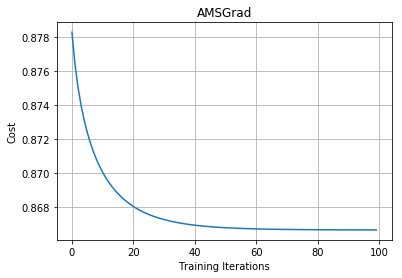

In [28]:
plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Do away with Learning rate using Adadelta 


With AdaDelta we completely get rid of learning rate. (Refer the section AdaDelta in the book for full explanation)

The update equation of AdaDelta is expressed as:

Running average of gradients:
$$E\left[g^{2}\right]_{t}=\gamma E\left[g^{2}\right]_{t-1}+(1-\gamma) g_{t}^{2} -- (13) $$

Compute delta:
$$ \nabla \theta_{t}=-\frac{R M S[\Delta \theta]_{t-1}}{R M S\left[g_{t}\right]} \cdot g_{t}^{i} -- (14) $$

Running averge of parameter update:
$$ E\left[\Delta \theta^{2}\right]_{t}=\gamma E\left[\Delta \theta^{2}\right]_{t-1}+(1-\gamma) \Delta \theta_{t}^{2} -- (15) $$

Update theta:
$$ \theta_{t}^{i}=\theta_{t-1}^{i}+\nabla \theta_{t} -- (16) $$

In [29]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 500):
    
    loss = []
    
    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])
    
    #initialize running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])
    
    
    for t in range(num_iterations):
        
        #compute gradients of loss with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute running average of gradients as given in equation (13)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        
        #compute delta_theta as given in equation (14)
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients
        
        #compute running average of parameter updates as given in equation (15)
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))
        
        #update the model parameter, theta as given in equation (16)
        theta = theta + delta_theta
        
        #store  the loss
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using AdaDelta and compute loss:

In [30]:
theta = np.zeros(2)
loss = AdaDelta(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

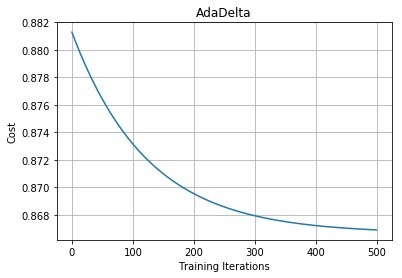

In [31]:
plt.plot(loss)
plt.grid()
plt.title('AdaDelta')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Overcoming limitations of AdaGrad using RMSProp

We learned that in AdaGrad learning rate would become very small when the sum of gradients is high. So, we RMSProp to overcome the limitations of RMSProp. (Refer section RMSProp in the book for full explanation).

The update equation of RMSProp is given as:

Running average of gradients:
$$E\left[g^{2}\right]_{t}=\gamma E\left[g^{2}\right]_{t-1}+(1-\gamma) g_{t}^{2} -- (17) $$

Update theta:
$$\theta_{t}^{i}=\theta_{t-1}^{i}-\frac{\eta}{\sqrt{E\left[g^{2}\right]_{t}+\epsilon}} \cdot g_{t}^{i} -- (18)$$

In [32]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations = 100): 
    
    loss= []
    
    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute running average of gradients as given in equation (17)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))
        
        #update model parameter as given in equation (18)
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using RMSProp and compute loss:

In [33]:
theta = np.zeros(2)
loss = RMSProp(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

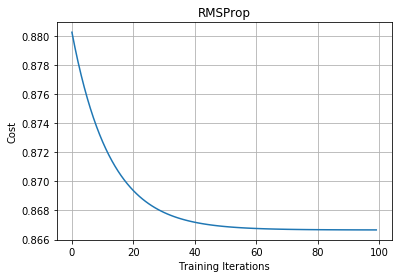

In [34]:
plt.plot(loss)
plt.grid()
plt.title('RMSProp')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Adam - Adaptive Moment Estimation


Check the section Adam in the book for the detailed explanation. The update equation of Adam is given as:

First moment estimate:
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right) g_{t} -- (19) $$

Second moment estimate:
$$v_{t}=\beta_{2} v_{t-1}+\left(1-\beta_{2}\right) g_{t}^{2} --(20)$$

Bias-corrected mt:
$$\hat{m}_{t}=\frac{m_{t}}{1-\beta_{1}^{t}} --(21) $$

Bias-corrected vt:
$$\hat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}} --(22) $$

Update theta:

$$\theta_{t}=\theta_{t-1}-\frac{\eta}{\sqrt{\hat{v}_{t}}+\epsilon} \hat{m}_{t} -- (23) $$

In [35]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):
   
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        
        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))
        
        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
      
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using Adam and compute loss:

In [36]:
theta = np.zeros(2)
loss = RMSProp(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

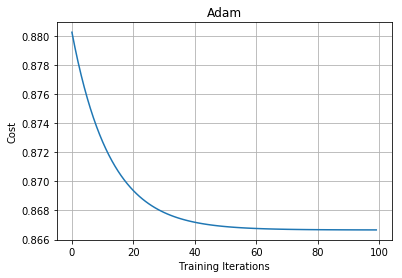

In [37]:
plt.plot(loss)
plt.grid()
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Adamax - Adam based on infinity norm


Check the section Adamax in the book for the detailed explanation. The update equation of Adamax is given as:

First moment estimate:
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right) g_{t} -- (24) $$

Second moment estimate:
$$v_{t}=\max \left(\beta_{2} \cdot v_{t-1},\left|g_{t}\right|\right) -- (25) $$

Bias-corrected mt:
$$\hat{m}_{t}=\frac{m_{t}}{1-\beta_{1}^{t}} -- (26) $$

Update theta:

$$\theta_{t}=\theta_{t-1}-\frac{\eta}{v_{t}} \hat{m}_{t} -- (27) $$


In [38]:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):
    
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment mt as given in equation (24)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment vt as given in equation (25)
        vt = np.maximum(beta2 * vt, np.abs(gradients))
        
        #compute bias-corrected estimate of mt as given in equation (26)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #update theta as give in equation (27)
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using Adamax and compute loss:

In [39]:
theta = np.zeros(2)
loss = Adamax(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

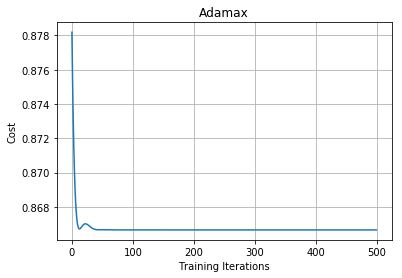

In [40]:
plt.plot(loss)
plt.grid()
plt.title('Adamax')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Adaptive Moment Estimation with AMSGrad


Refer the section AMSGrad in the book for the detailed explanation. The update equation of AMSGrad is given as:

First moment estimate:
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right) g_{t} -- (28) $$

Second moment estimate:
$$v_{t}=\beta_{2} v_{t-1}+\left(1-\beta_{2}\right) g_{t}^{2} --(29) $$

Updated second moment estimate:
$$\hat{v}_{t}=\max \left(\hat{v}_{t-1}, v_{t}\right) -- (30) $$

Bias-corrected mt:
$$\hat{m}_{t}=\frac{m t}{1-\beta_{1}^{t}} -- (31) $$

Update theta:
$$\theta_{t}=\theta_{t-1}-\frac{\eta}{\sqrt{\hat{v}_{t}}+\epsilon} \hat{m}_{t} -- (32) $$

In [41]:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 50):
    
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    
    #initialize vt_hat
    vt_hat = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment as given in equation (28)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment as given in equation (29)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        
        #compute vt_hat as given in equation (30)
        vt_hat = np.maximum(vt_hat,vt)
        
        #compute bias-corrected estimate of mt as shown in equation (31)
        mt_hat = mt / (1. - beta1 ** (t+1))
        
        #update model parameter theta as given in (32)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store loss
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using AMSGrad and compute loss:

In [42]:
theta = np.zeros(2)
loss = AMSGrad(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

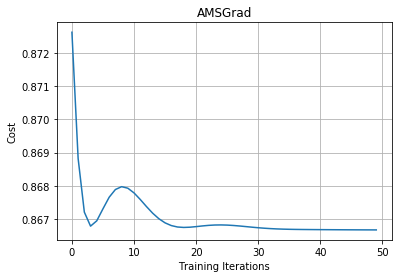

In [43]:
plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Nadam - Adding NAG to ADAM


Refer the section Nadam in the book for the detailed explanation. The update equation of Nadam is given as:


First moment estimate:
$$m_{t}=\beta_{1} m_{t-1}+\left(1-\beta_{1}\right) g_{t} -- (33) $$

Second moment estimate:
$$v_{t}=\beta_{2} v_{t-1}+\left(1-\beta_{2}\right) g_{t}^{2} -- (34) $$

Bias-corrected mt:
$$\hat{m}_{t}=\frac{m_{t}}{1-\prod_{i=1}^{t+1} \beta_{1}^{i}} -- (35) $$

Bias-corrected gt:
$$\hat{g}_{t}=\frac{g_{t}}{1-\prod_{i=1}^{t} \beta_{1}^{i}} -- (36) $$

Bias-corrected vt:
$$ \hat{v}_{t}=\frac{v_{t}}{1-\beta_{2}^{t}} -- (37) $$

Compute m tilde:
$$ \tilde{m}_{t}=\beta_{1}^{t+1} \hat{m}_{t}+\left(1-\beta_{1}^{t}\right) \hat{g}_{t} -- (38) $$

Update theta:
$$ \theta_{t}=\theta_{t-1}-\frac{\eta}{\sqrt{v_{t}}+\epsilon} \tilde{m}_{t} -- (39) $$

In [44]:
def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 50):
   
    loss = []
    
    #initialize first moment mt
    mt = np.zeros(theta.shape[0])
    
    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    beta_prod = 1
    
    for t in range(num_iterations):
        
        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)
        
        #compute first moment as given in equation (33)
        mt = beta1 * mt + (1. - beta1) * gradients
        
        #compute second moment as given in equation (34)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)
        
        #compute bias-corrected estimates of mt as shown in (35)
        mt_hat = mt / (1. - beta_prod)
        
        #compute bias-corrected estimate of gt as shown in (36)
        g_hat = gradients / (1. - beta_prod)
        
        #compute bias-corrected estimate of vt as shown in (37)
        vt_hat = vt / (1. - beta2 ** (t))
        
        #compute mt tilde as shown in (38)
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)
        
        #update theta as given in (39)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat
        
        #store the loss
        loss.append(loss_function(data,theta))

    return loss

Update model parameter using AMSGrad and compute loss:

In [45]:
theta = np.zeros(2)
loss = Nadam(data, theta) 

Plot the loss:

Text(0,0.5,'Cost')

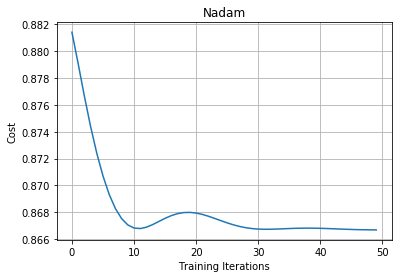

In [46]:
plt.plot(loss)
plt.grid()
plt.title('Nadam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

Now that we have learned several variants of gradient descent in the next chapter we will learn about one of the most popularly used deep learning algorithms called Recurrent Neural Network(RNN) which is widely used for the language tasks.  